# Theoretical analysis:

## Time Complexity:
- **Best Case**: $O(\frac{n}{s} \cdot s + n\log(\frac{n}{s})) \approx O(n + n\log(\frac{n}{s}))$
- **Average Case**: $O(\frac{n}{s} \cdot s^2 + n\log(\frac{n}{s})) \approx O(n \cdot s + n\log(\frac{n}{s}))$
- **Worst Case**: $O(\frac{n}{s} \cdot s^2 + n\log(\frac{n}{s})) \approx O(n \cdot s + n\log(\frac{n}{s}))$

## Where:
- $n$ is the input size
- $s$ is the threshold value for switching between merge sort and insertion sort

## 1. Function of Original Merge Sort

In [2]:
import collections
def merge_sort(arr, left, right, counter):
    """
    Recursive function to run merge_sort

    Arg:
    arr: array
    left: left pointer of arr
    right: right pointer of arr
    counter: list of a single number to keep track of counts
    """
    if left>=right:
        return
    
    mid = (left+right)//2
    merge_sort(arr, left, mid, counter)
    merge_sort(arr, mid+1, right, counter)
    merge(arr, left, mid, right, counter)

def merge(arr, left, mid, right, counter):
    """
    Function to merge arrays

    Arg:
    arr: array
    left: left pointer of arr
    mid: middle pointer of arr
    right: right pointer of arr
    counter: list of a single number to keep track of counts
    """
    L = arr[left:mid+1]
    R = arr[mid+1:right+1]
    idx = left
    l, r = 0, 0 
    while l<len(L) and r<len(R):
        counter[0]+=1
        if L[l]<=R[r]:
            arr[idx] = L[l]
            l+=1
        else:
            arr[idx] = R[r]
            r+=1
        idx+=1
    
    while l<len(L):
        arr[idx] = L[l]
        idx+=1
        l+=1

    while r<len(R):
        arr[idx] = R[r]
        idx+=1 
        r+=1  

#Test Function
c = [0]
a = [1,9,2,3,4]
merge_sort(a, 0, 4, c)
print(a, c)

[1, 2, 3, 4, 9] [8]


## 2. Function to Run Single Experiment

In [3]:
import random
import time
import algorithm
def run(x, n, S, mode="hybrid"):
    """
    Function to run a single experiment

    Arg:
    x: the maximum data in dataset
    n: the number of data in datasets
    S: the threshold value

    Return:
    map of values 
    """
    a = [random.randint(1, x) for _ in range(n)]
    counter = [0]
    t0 = time.perf_counter()
    if mode=="hybrid":
        algorithm.hybrid_mergesort(a, counter, S)
    else:
        merge_sort(a, 0, len(a)-1, counter)
    t1 = time.perf_counter()
    return {"comp": counter[0], "time": t1 - t0}

#Test
print(run(10, 1000, 10))

    

{'comp': 8098, 'time': 0.0036697000032290816}


## 3. Main Analysis Function

In [19]:
import csv
def analysis(n_val, trial_no, S_values, mode="hybrid", out_csv="results.csv"):
    """
    Function to do analyse the hybrid_sort algorithm and classic merge_sort algorithm
    
    Arg:
    n_val: list of input sizes 
    trial_no: number of times test is repeated for each list of specific size
    S_values: list of S(thresold values) for testing
    mode: hybrid/merge_sort mode
    out_csv: name of the output csv file
    """
    fieldnames = ['mode','n','S','trial','comparisons','time_s']
    with open(out_csv, "w", newline="") as f:
        writer = csv.DictWriter(f, fieldnames)
        writer.writeheader()
        for n in n_val:
            for S in S_values:
                for t in range(1, trial_no+1):
                    print(f"Running mode={mode} n={n} S={S} trial={t}")
                    res = run(1000, n, S)
                    writer.writerow({'mode':mode,'n':n,'S':S,'trial':t,
                                    'comparisons':res['comp'],'time_s':res['time']})
                    f.flush()

#Generating CSV for fixed S
n_val = [int(x) for x in np.logspace(3, 7, num=30)]
S_val = [s for s in range(81)]
analysis(n_val, 3, S_val)


Running mode=hybrid n=1000 S=0 trial=1
Running mode=hybrid n=1000 S=0 trial=2
Running mode=hybrid n=1000 S=0 trial=3
Running mode=hybrid n=1000 S=1 trial=1
Running mode=hybrid n=1000 S=1 trial=2
Running mode=hybrid n=1000 S=1 trial=3
Running mode=hybrid n=1000 S=2 trial=1
Running mode=hybrid n=1000 S=2 trial=2
Running mode=hybrid n=1000 S=2 trial=3
Running mode=hybrid n=1000 S=3 trial=1
Running mode=hybrid n=1000 S=3 trial=2
Running mode=hybrid n=1000 S=3 trial=3
Running mode=hybrid n=1000 S=4 trial=1
Running mode=hybrid n=1000 S=4 trial=2
Running mode=hybrid n=1000 S=4 trial=3
Running mode=hybrid n=1000 S=5 trial=1
Running mode=hybrid n=1000 S=5 trial=2
Running mode=hybrid n=1000 S=5 trial=3
Running mode=hybrid n=1000 S=6 trial=1
Running mode=hybrid n=1000 S=6 trial=2
Running mode=hybrid n=1000 S=6 trial=3
Running mode=hybrid n=1000 S=7 trial=1
Running mode=hybrid n=1000 S=7 trial=2
Running mode=hybrid n=1000 S=7 trial=3
Running mode=hybrid n=1000 S=8 trial=1
Running mode=hybrid n=100

KeyboardInterrupt: 

# Graph for 1ci:

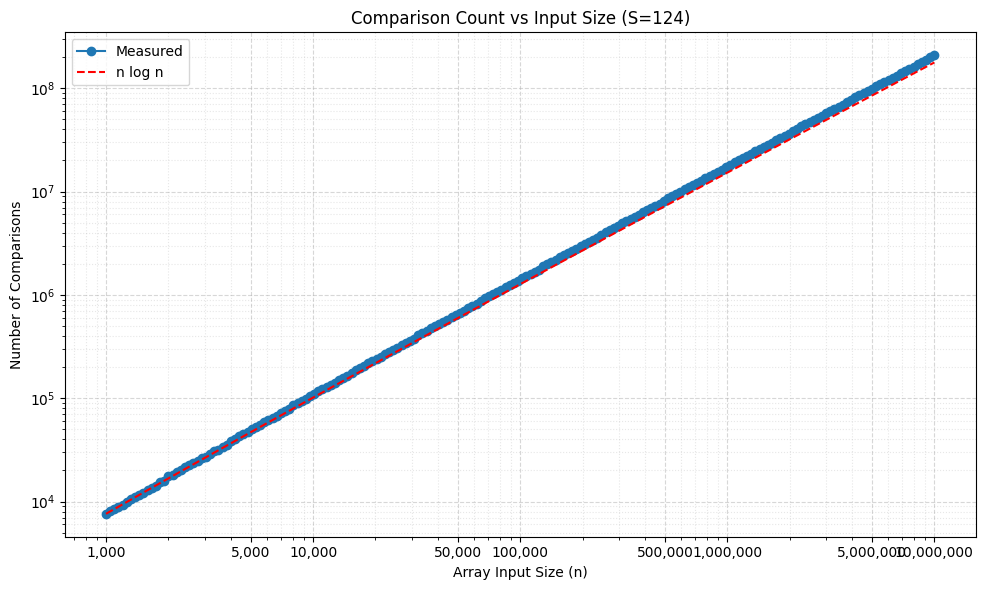

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("results.csv")
df_fixedS = df[(df.S==124)]
n_median = df_fixedS.groupby('n')['comparisons'].median().reset_index()

# Create theoretical n log n curve
x = np.logspace(3, 7, 100)  # Generate points between 10^3 and 10^7
y_theoretical = x * np.log2(x)  # n log n curve
# Scale to match experimental data
scale_factor = n_median['comparisons'].iloc[0] / (n_median['n'].iloc[0] * np.log2(n_median['n'].iloc[0]))
y_theoretical *= scale_factor

plt.figure(figsize=(10, 6))
# Plot experimental data
plt.loglog(n_median['n'], n_median['comparisons'], marker='o', linestyle='-', label="Measured")
# Plot theoretical curve
plt.loglog(x, y_theoretical, 'r--', label="n log n")

# axis scales
plt.xscale("log")
plt.yscale("log")

xticks = [1_000, 5_000, 10_000, 50_000, 100_000,
          500_000, 1_000_000, 5_000_000, 10_000_000]
plt.xticks(xticks, [f"{x:,}" for x in xticks])

plt.xlabel("Array Input Size (n)")
plt.ylabel("Number of Comparisons")
plt.title("Comparison Count vs Input Size (S=124)")
plt.grid(True, which="major", ls="--", alpha=0.5)
plt.grid(True, which="minor", ls=":", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


## Normalised comparisons

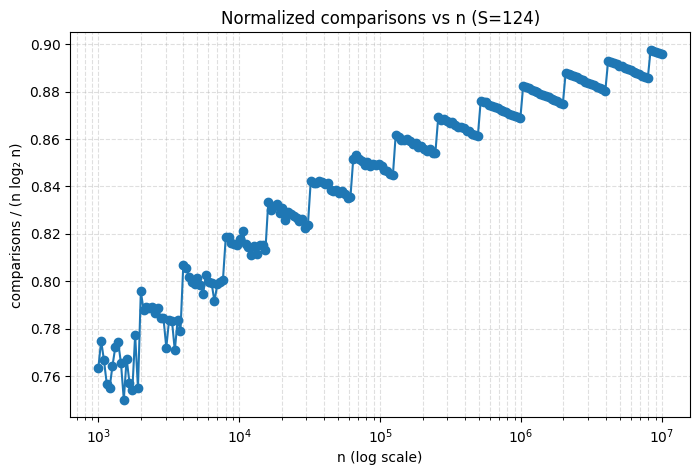

In [27]:
n_median["nlogn"] = n_median["n"] * np.log2(n_median["n"])
n_median["ratio"] = n_median["comparisons"] / n_median["nlogn"]

plt.figure(figsize=(8,5))
plt.semilogx(n_median["n"], n_median["ratio"], marker="o")
plt.xlabel("n (log scale)")
plt.ylabel("comparisons / (n log₂ n)")
plt.title("Normalized comparisons vs n (S=124)")
plt.grid(True, which="both", ls="--", alpha=0.4)
plt.show()

## Analysis:
(Each data point is the median of 3 trials of the same set of data)
1. A straight line graph on a log-log scale which corresponds to the graph of O(nlogn). In our case: $O(124n + nlogn) \approx O(nlogn)$ and proven by normalised comparison which is roughly flat. The see-saw pattern shown is due to how merge sort always split evenly.

2. Slope of log-log scale slightly above 1 which suggests that it grows slightly faster than O(n)


In [ ]:
n_value = [1000]
S_value = [n for n in range(1, 10)]
analysis(n_value, 3, S_value, out_csv="fixed_n(1000).csv")

n_value = [100000]
S_value = [n for n in range(1, 10)]
analysis(n_value, 3, S_value, out_csv="fixed_n(100000).csv")

Running mode=hybrid n=1000 S=1 trial=1
Running mode=hybrid n=1000 S=1 trial=2
Running mode=hybrid n=1000 S=1 trial=3
Running mode=hybrid n=1000 S=2 trial=1
Running mode=hybrid n=1000 S=2 trial=2
Running mode=hybrid n=1000 S=2 trial=3
Running mode=hybrid n=1000 S=3 trial=1
Running mode=hybrid n=1000 S=3 trial=2
Running mode=hybrid n=1000 S=3 trial=3
Running mode=hybrid n=1000 S=4 trial=1
Running mode=hybrid n=1000 S=4 trial=2
Running mode=hybrid n=1000 S=4 trial=3
Running mode=hybrid n=1000 S=5 trial=1
Running mode=hybrid n=1000 S=5 trial=2
Running mode=hybrid n=1000 S=5 trial=3
Running mode=hybrid n=1000 S=6 trial=1
Running mode=hybrid n=1000 S=6 trial=2
Running mode=hybrid n=1000 S=6 trial=3
Running mode=hybrid n=1000 S=7 trial=1
Running mode=hybrid n=1000 S=7 trial=2
Running mode=hybrid n=1000 S=7 trial=3
Running mode=hybrid n=1000 S=8 trial=1
Running mode=hybrid n=1000 S=8 trial=2
Running mode=hybrid n=1000 S=8 trial=3
Running mode=hybrid n=1000 S=9 trial=1
Running mode=hybrid n=100

# Graph for 1cii:

## Graph for small n and small S

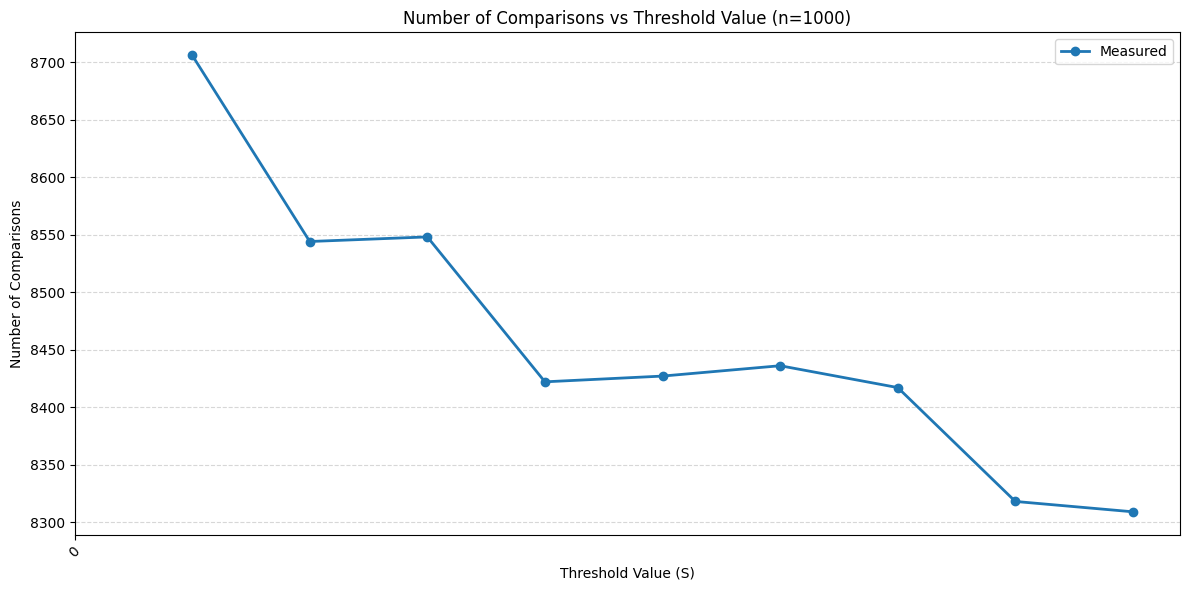

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("fixed_n(1000).csv")
s_median = df.groupby('S')['comparisons'].median().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(s_median['S'], s_median['comparisons'], marker='o', linestyle='-', linewidth=2, label='Measured')

plt.xlabel("Threshold Value (S)")
plt.ylabel("Number of Comparisons")
plt.title("Number of Comparisons vs Threshold Value (n=1000)")
plt.grid(True, which="major", ls="--", alpha=0.5)
plt.grid(True, which="minor", ls=":", alpha=0.2)
plt.xticks(np.arange(0, int(s_median['S'].max())+1, 25), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Graph for large n and small S

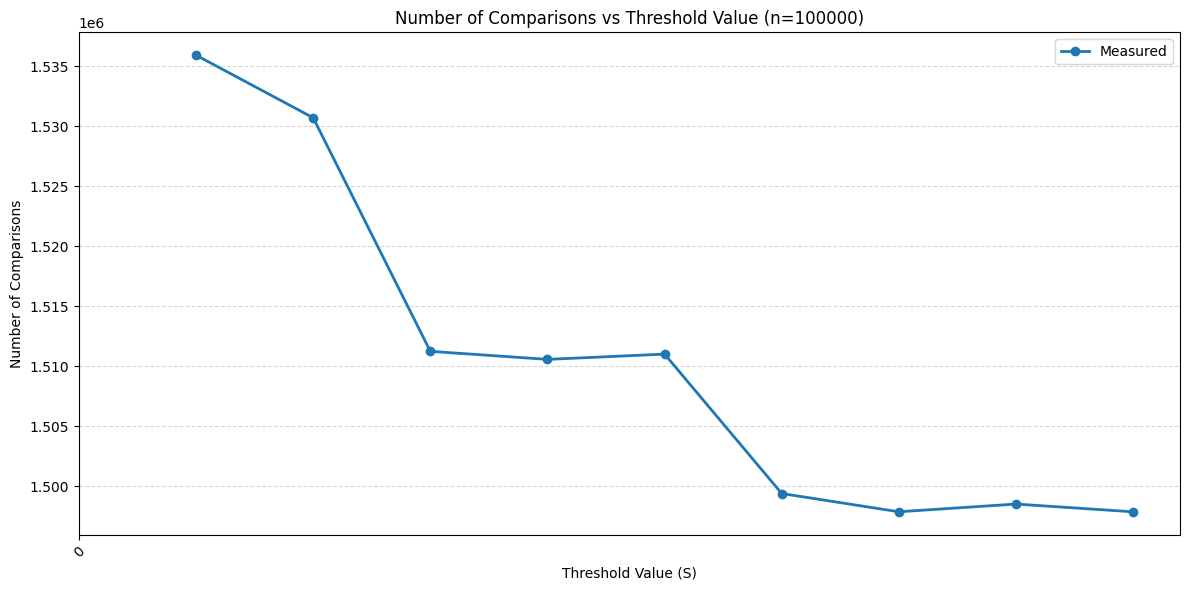

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("fixed_n(100000).csv")
s_median = df.groupby('S')['comparisons'].median().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(s_median['S'], s_median['comparisons'], marker='o', linestyle='-', linewidth=2, label='Measured')

plt.xlabel("Threshold Value (S)")
plt.ylabel("Number of Comparisons")
plt.title("Number of Comparisons vs Threshold Value (n=100000)")
plt.grid(True, which="major", ls="--", alpha=0.5)
plt.grid(True, which="minor", ls=":", alpha=0.2)
plt.xticks(np.arange(0, int(s_median['S'].max())+1, 25), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Graph for small n and big s 

In [13]:
n_value = [1000]
S_value = [n for n in range(1, 200)]
analysis(n_value, 3, S_value, out_csv="fixed_n(1000)_and_big_s.csv")

Running mode=hybrid n=1000 S=1 trial=1
Running mode=hybrid n=1000 S=1 trial=2
Running mode=hybrid n=1000 S=1 trial=3
Running mode=hybrid n=1000 S=2 trial=1
Running mode=hybrid n=1000 S=2 trial=2
Running mode=hybrid n=1000 S=2 trial=3
Running mode=hybrid n=1000 S=3 trial=1
Running mode=hybrid n=1000 S=3 trial=2
Running mode=hybrid n=1000 S=3 trial=3
Running mode=hybrid n=1000 S=4 trial=1
Running mode=hybrid n=1000 S=4 trial=2
Running mode=hybrid n=1000 S=4 trial=3
Running mode=hybrid n=1000 S=5 trial=1
Running mode=hybrid n=1000 S=5 trial=2
Running mode=hybrid n=1000 S=5 trial=3
Running mode=hybrid n=1000 S=6 trial=1
Running mode=hybrid n=1000 S=6 trial=2
Running mode=hybrid n=1000 S=6 trial=3
Running mode=hybrid n=1000 S=7 trial=1
Running mode=hybrid n=1000 S=7 trial=2
Running mode=hybrid n=1000 S=7 trial=3
Running mode=hybrid n=1000 S=8 trial=1
Running mode=hybrid n=1000 S=8 trial=2
Running mode=hybrid n=1000 S=8 trial=3
Running mode=hybrid n=1000 S=9 trial=1
Running mode=hybrid n=100

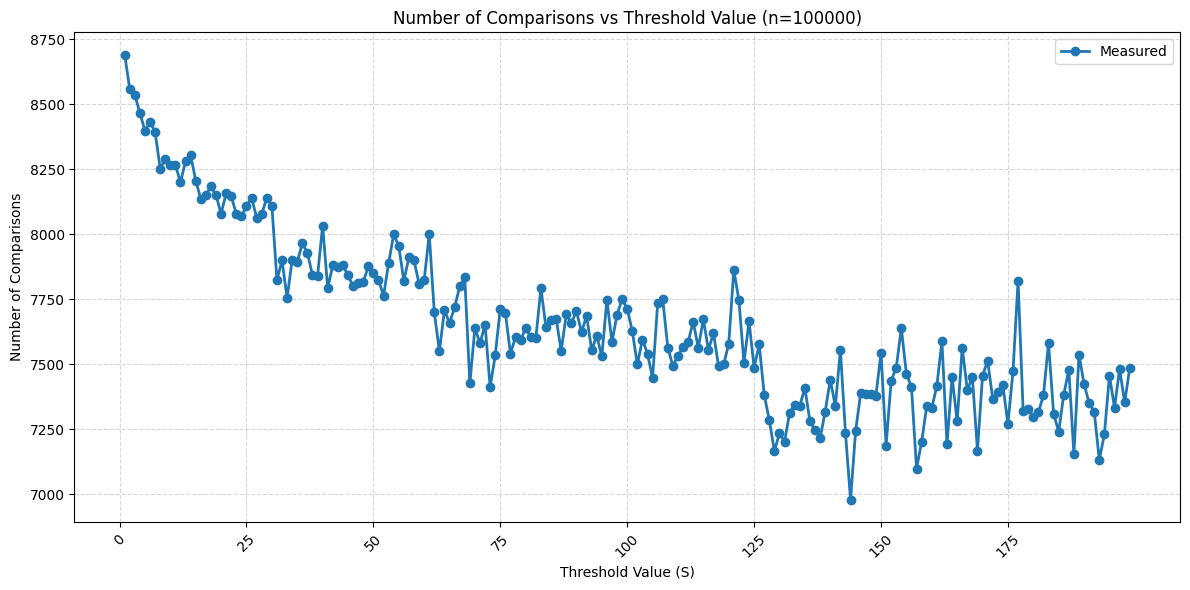

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("fixed_n(1000)_and_big_s.csv")
s_median = df.groupby('S')['comparisons'].median().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(s_median['S'], s_median['comparisons'], marker='o', linestyle='-', linewidth=2, label='Measured')

plt.xlabel("Threshold Value (S)")
plt.ylabel("Number of Comparisons")
plt.title("Number of Comparisons vs Threshold Value (n=1000)")
plt.grid(True, which="major", ls="--", alpha=0.5)
plt.grid(True, which="minor", ls=":", alpha=0.2)
plt.xticks(np.arange(0, int(s_median['S'].max())+1, 25), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Graph for big n and big s

In [16]:
n_value = [100000]
S_value = [n for n in range(1, 200)]
analysis(n_value, 3, S_value, out_csv="fixed_n(100000)_and_big_s.csv")

Running mode=hybrid n=100000 S=1 trial=1
Running mode=hybrid n=100000 S=1 trial=2
Running mode=hybrid n=100000 S=1 trial=3
Running mode=hybrid n=100000 S=2 trial=1
Running mode=hybrid n=100000 S=2 trial=2
Running mode=hybrid n=100000 S=2 trial=3
Running mode=hybrid n=100000 S=3 trial=1
Running mode=hybrid n=100000 S=3 trial=2
Running mode=hybrid n=100000 S=3 trial=3
Running mode=hybrid n=100000 S=4 trial=1
Running mode=hybrid n=100000 S=4 trial=2
Running mode=hybrid n=100000 S=4 trial=3
Running mode=hybrid n=100000 S=5 trial=1
Running mode=hybrid n=100000 S=5 trial=2
Running mode=hybrid n=100000 S=5 trial=3
Running mode=hybrid n=100000 S=6 trial=1
Running mode=hybrid n=100000 S=6 trial=2
Running mode=hybrid n=100000 S=6 trial=3
Running mode=hybrid n=100000 S=7 trial=1
Running mode=hybrid n=100000 S=7 trial=2
Running mode=hybrid n=100000 S=7 trial=3
Running mode=hybrid n=100000 S=8 trial=1
Running mode=hybrid n=100000 S=8 trial=2
Running mode=hybrid n=100000 S=8 trial=3
Running mode=hyb

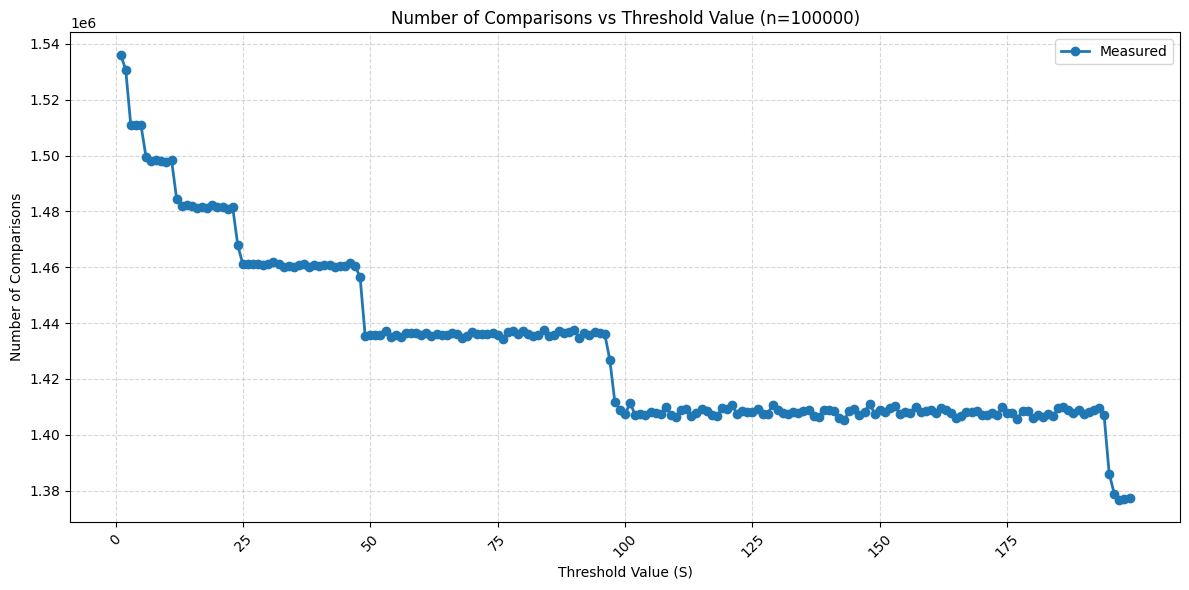

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("fixed_n(100000)_and_big_s.csv")
s_median = df.groupby('S')['comparisons'].median().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(s_median['S'], s_median['comparisons'], marker='o', linestyle='-', linewidth=2, label='Measured')

plt.xlabel("Threshold Value (S)")
plt.ylabel("Number of Comparisons")
plt.title("Number of Comparisons vs Threshold Value (n=100000)")
plt.grid(True, which="major", ls="--", alpha=0.5)
plt.grid(True, which="minor", ls=":", alpha=0.2)
plt.xticks(np.arange(0, int(s_median['S'].max())+1, 25), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Analysis:

1. For small n=1000 and small S as well as large n and small S, as the threshold value increases, there is an overall downward trend in the number of comparisons. Increasing small value of S makes $O(nlog(\frac {n}{s})))$ term decreases. As S increases, the merge levels will decrease, and thus the merging comparisons will decrease.
2. For large S, as the threshold value increases, there is also an overall downward trend, but there is a stair-like pattern. This is because as S crosses the boundary of $\frac{n}{2^k}$ the merge level decreases by 1. Take for example array of size 20 and S = 6, it will then be halved to {10,10} then {5, 5}, if S is in the range(6, 9) then it will only execute insertion sort on the third level of recursion.

# Determining Optimal S

## Comparison-Optimal S

C:\Users\jesmo\AppData\Local\Temp\ipykernel_22092\4008082255.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.groupby("S")["comparisons"].median().idxmin())


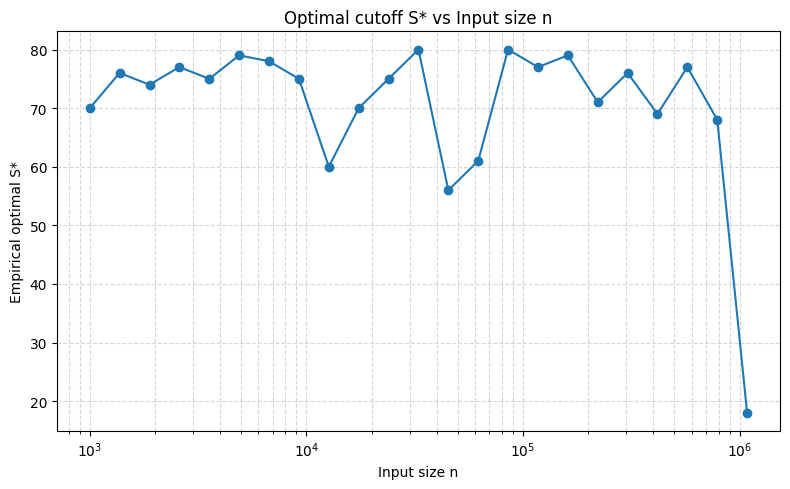

      n  S_opt
0  1000     70
1  1373     76
2  1887     74
3  2592     77
4  3562     75


In [20]:
#For each n, determine the S that results in the smallest comparisons
#Plot a S* against n graph, S* corresponds to the S that results in smallest comparisons
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load results
df = pd.read_csv("results.csv")

# Find empirical optimal S for each n (min median comparisons)
optS = (df.groupby("n")
          .apply(lambda g: g.groupby("S")["comparisons"].median().idxmin())
          .reset_index(name="S_opt"))

# Plot S* vs n
plt.figure(figsize=(8,5))
plt.plot(optS["n"], optS["S_opt"], marker="o")
plt.xscale("log")  # log scale for n
plt.xlabel("Input size n")
plt.ylabel("Empirical optimal S*")
plt.title("Optimal cutoff S* vs Input size n")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

print(optS.head())


## Runtime-Optimal S

C:\Users\jesmo\AppData\Local\Temp\ipykernel_22092\811853578.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.groupby("S")["time_s"].median().idxmin())


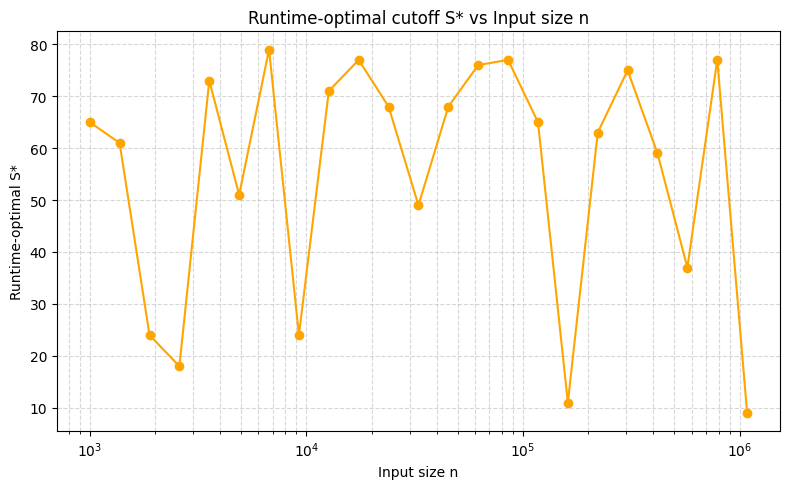

      n  S_opt_time
0  1000          65
1  1373          61
2  1887          24
3  2592          18
4  3562          73


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load results
df = pd.read_csv("results.csv")

# Find empirical S* for runtime (minimum median time)
optS_time = (df.groupby("n")
               .apply(lambda g: g.groupby("S")["time_s"].median().idxmin())
               .reset_index(name="S_opt_time"))

# Plot runtime-optimal S* vs n
plt.figure(figsize=(8,5))
plt.plot(optS_time["n"], optS_time["S_opt_time"], marker="o", color="orange")
plt.xscale("log")  # log scale for n
plt.xlabel("Input size n")
plt.ylabel("Runtime-optimal S*")
plt.title("Runtime-optimal cutoff S* vs Input size n")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

print(optS_time.head())


# Analysis

<strong>Optimal <i>S</i> by comparisons:</strong>
<p>In the first graph we plotted out the optimal S which results in the least comparison count for each n. For small values n, the optimal S lies in between 60 to 80. There is a sudden drop to 16 for larger values of n. </p>

<strong>Optimal <i>S</i> by runtime:</strong>
<p>In the second graph we plotted out the optimal S which results in the least runtime for each n. For small values of n, the optimal S lies in between 60 to 80 although sometimes dropping to around 15-25. For larger n, the optimal S lies somewhere in between 15-20.</p>

<strong>Reason for large <i>S</i> for small values of n:</strong>
<p>The cost of merging is typically quite high as compared to insertion sort, thus insertion sort is much preferred.</p>

<strong>Reason for small <i>S</i> for large values of n:</strong>
<p>The quadratic time complexity of insertion sort grows too fast and thus there will be a short cutoff at low value of S.</p>

### Conclusion:
Although for small n, the cutoff is around 60 to 80, this is largely due to constant factors and not asymptotic behaviour. For larger n, the optimal S is around 15 to 20. Thus our team decides to choose optimal S to be 16, since for small n, the merge Sort is already fast and efficient enough.

# 1d: Compare with original Mergesort:

In [ ]:
#Run the analysis function 
#Analysis:
results_hybrid = run(10000, 10**7, 16)
result_merge = run(10000, 10**7, 16, mode="merge")

print(result_merge, results_hybrid)

{'comp': 220096555, 'time': 173.55337430001236} {'comp': 215282203, 'time': 64.42257499997504}


In [6]:
diff_comp = 220096555-215282203
decrease_in_comp = diff_comp/220096555 * 100
print(diff_comp)
print(decrease_in_comp)

diff_runtime = 173.55337430001236 - 64.42257499997504
decrease_in_runtime = diff_runtime/173.55337430001236 * 100
print(diff_runtime)
print(decrease_in_runtime)

4814352
2.1873818061350394
109.13079930003732
62.880252106990895


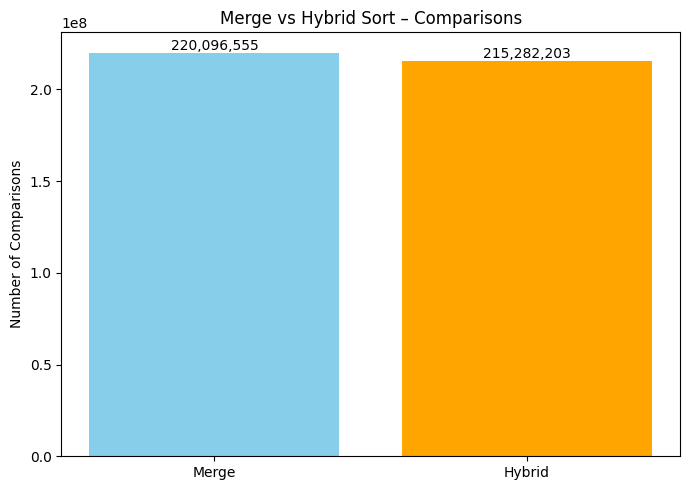

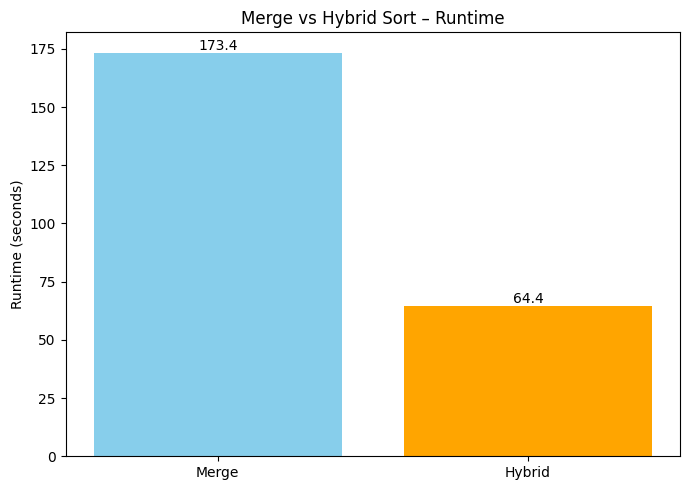

In [ ]:
import matplotlib.pyplot as plt

comparisons = {
    "Merge": 220096555,
    "Hybrid": 215282203
}

runtime = {
    "Merge": 173.4,   
    "Hybrid": 64.4
}

# --- Plot 1: Comparisons ---
fig, ax = plt.subplots(figsize=(7,5))
ax.bar(comparisons.keys(), comparisons.values(), color=["skyblue","orange"])
ax.set_ylabel("Number of Comparisons")
ax.set_title("Merge vs Hybrid Sort – Comparisons")

# Add value labels
for i, (label, val) in enumerate(comparisons.items()):
    ax.text(i, val, f"{val:,}", ha="center", va="bottom")

plt.tight_layout()
plt.show()


# --- Plot 2: Runtime ---
fig, ax = plt.subplots(figsize=(7,5))
ax.bar(runtime.keys(), runtime.values(), color=["skyblue","orange"])
ax.set_ylabel("Runtime (seconds)")
ax.set_title("Merge vs Hybrid Sort – Runtime")

# Add value labels
for i, (label, val) in enumerate(runtime.items()):
    ax.text(i, val, f"{val:.1f}", ha="center", va="bottom")

plt.tight_layout()
plt.show()


# Analysis
Difference in comparisons: 220096555 - 215282203 = 4814352
<br>
Decrease in comp(%): 2.19%

Decrease in runtime: 109s
<br>
Decrease in runtime(%): 62.9%

<strong>Reason for small decrease in comparisons while large decrease in runtime:</strong> 
<br>
From here we can conclude that number of comparisons does not really corresponds to runtime. Runtime also depends largely on recursion level and caching in the python context.